[Map1](https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d)

In [ ]:
!pip install geopandas
!pip install descartes
!pip install shapely

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plotty
from shapely.geometry import Point, Polygon
%matplotlib inline

In [ ]:
pricing_data = pd.read_csv('../data/raw/01_06_2014_until_04_06_2019.csv')
# We can load the 1gb master csv of postcode data into memory with pandas
postcode_data = pd.read_csv('../data/raw/NSPL_MAY_2019_UK.csv', low_memory=False)

In [4]:
left = pricing_data
right = postcode_data
merged = pd.merge(left, right, how='inner', left_on='postcode', right_on='pcd')
filename = '../data-science/summative-assignment/data/interim/merged.csv'
merged.to_csv(filename, encoding='utf-8', index=False)
merged.shape

merged.csv        merged_latlon.csv


In [6]:
df = pd.read_csv('../data/interim/merged_latlon.csv')

In [17]:
geometry = [Point(xy) for xy in zip( df["long"], df["lat"])]
geometry[:3]

In [88]:
# Create the geo DataFrame that the map likes
crs={'init': 'epsg:27700'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

unique_id  price_paid   deed_date postcode  \
0  87E1551E-DAC2-6405-E053-6C04A8C0B2EE      475000  01/04/2019  E10 5AB   
1  6F780634-0B87-4590-A8BC-DE45C7106587      250000  03/10/2014  E10 5AD   
2  F59B1038-7C09-4E8D-8F40-2117150EFBD5      215000  09/10/2014  E10 5AD   
3  23B6165E-2366-FCF4-E050-A8C0620577FA      260000  03/10/2015  E10 5AD   
4  75EF0750-5B3B-4E4A-9C8A-CB4A61D2CC87      250000  09/02/2015  E10 5AH   

  property_type new_build estate_type     saon               paon  \
0             O         N           F      NaN                775   
1             F         N           L   FLAT 2  AYERST COURT, 162   
2             F         N           L  FLAT 26  AYERST COURT, 162   
3             F         N           L  FLAT 32  AYERST COURT, 162   
4             F         N           L  FLAT 34  OSBORNE COURT, 23   

             street  ... oac11        lat      long       lep1 lep2  \
0  HIGH ROAD LEYTON  ...   3A2  51.572993 -0.008746  E37000023  NaN   
1     BEAUMONT ROAD  ...   3A2  51.572863 -0.009703  E37000023  NaN   
2     BEAUMONT ROAD  ...   3A2  51.572863 -0.009703  E37000023  NaN   
3     BEAUMONT ROAD  ...   3A2  51.572863 -0.009703  E37000023  NaN   
4   CAPWORTH STREET  ...   3A1  51.572824 -0.011624  E37000023  NaN   

         pfa   imd     calncv        stp  \
0  E23000001  2438  E57000002  E54000029   
1  E23000001  2438  E57000002  E54000029   
2  E23000001  2438  E57000002  E54000029   
3  E23000001  2438  E57000002  E54000029   
4  E23000001  2438  E57000002  E54000029   

                                  geometry  
0  POINT (-0.008745999999999999 51.572993)  
1              POINT (-0.009703 51.572863)  
2              POINT (-0.009703 51.572863)  
3              POINT (-0.009703 51.572863)  
4              POINT (-0.011624 51.572824)  

[5 rows x 58 columns]

In [89]:
# Import the shapefile we want to plot
# set the filepath and load in a shapefile
# !ls ../data/raw/geo-data-master/uk/london/london-wards-2014-shapefile/2014-london-wards.shp
shape_file = '../data/raw/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
borough_map = gpd.read_file(shape_file)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1     None  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2     None  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3     None  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4     None  POLYGON ((510253.5 182881.6, 510249.9 182886, ...

In [104]:
geo_df

unique_id  price_paid   deed_date postcode  \
0       87E1551E-DAC2-6405-E053-6C04A8C0B2EE      475000  01/04/2019  E10 5AB   
1       6F780634-0B87-4590-A8BC-DE45C7106587      250000  03/10/2014  E10 5AD   
2       F59B1038-7C09-4E8D-8F40-2117150EFBD5      215000  09/10/2014  E10 5AD   
3       23B6165E-2366-FCF4-E050-A8C0620577FA      260000  03/10/2015  E10 5AD   
4       75EF0750-5B3B-4E4A-9C8A-CB4A61D2CC87      250000  09/02/2015  E10 5AH   
5       64342BFE-0F51-422C-E053-6C04A8C0FB8A      270000  19/12/2017  E10 5AJ   
6       9A2C66FF-F413-49A4-B087-426C17FFAB60      150000  08/08/2014  E10 5AJ   
7       31FB4C17-2737-57B9-E050-A8C063053436      137000  28/01/2016  E10 5AJ   
8       7E86B6FA-B87D-458C-E053-6B04A8C0C84C      215000  11/12/2018  E10 5AJ   
9       432F38D2-1C1F-4C33-A5AA-74DB117338D0      200000  29/07/2014  E10 5AP   
10      55BDCAE5-D736-521D-E053-6B04A8C0DD7A      260000  12/06/2017  E10 5AP   
11      B874A6B2-CC09-4751-8B43-ED24C0342FB3      250000  08/07/2015  E10 5AP   
12      25EA59F9-A2A4-4D50-E050-A8C0630562D0      400000  12/11/2015  E10 5AR   
13      7F377B00-2FA2-4B38-86FF-B41088EC01B2      480000  18/12/2014  E10 5AX   
14      582D0636-D836-8F22-E053-6C04A8C01BAC      670000  11/08/2017  E10 5AX   
15      23B6165E-9F69-FCF4-E050-A8C0620577FA      400000  28/09/2015  E10 5AX   
16      78B51074-9144-437E-990F-B0AC095AB6DC      415000  27/03/2015  E10 5AX   
17      C4E6F27C-755F-46B4-84A2-D3235C920E2F      371000  27/10/2014  E10 5AX   
18      2AC10E4F-6C05-1AF6-E050-A8C063052BA1      365000  28/08/2015  E10 5AX   
19      47844C7F-A929-8986-E050-A8C063056488      455000  07/12/2016  E10 5AX   
20      DDC1187A-FC0F-4FFA-B805-4399A78B3FCE      465000  11/07/2014  E10 5AX   
21      3B7E0B8F-BF0C-EA99-E050-A8C062057E77      331100  24/06/2016  E10 5AX   
22      4FBAB7A7-BBC6-4C0D-AF88-6A630C928E6B      395000  15/05/2015  E10 5AX   
23      21E5FEB6-FB00-2439-E050-A8C06205342E      275000  25/07/2014  E10 5AX   
24      2AC10E4F-6198-1AF6-E050-A8C063052BA1      250000  17/12/2015  E10 5AY   
25      479E9F5A-BEA9-4261-8AE9-402A19BD08D7      249995  06/08/2015  E10 5AY   
26      85D0EE58-3299-4316-AE90-D35312143D26      255000  26/06/2015  E10 5AY   
27      64342BFF-4677-422C-E053-6C04A8C0FB8A       30500  13/12/2017  E10 5AY   
28      4C4EDFFE-EC19-1854-E050-A8C063054F34      485000  17/02/2017  E10 5AY   
29      7E9FCCF5-747C-4E3D-946F-4FF3374894E1      335000  24/04/2015  E10 5AY   
...                                      ...         ...         ...      ...   
157442  726BF13B-B4EA-0A46-E053-6C04A8C01D0D      500000  29/06/2018  W1W 8AQ   
157443  288DCE2A-13A5-E510-E050-A8C06205480E    44750000  25/11/2015  W1W 8AW   
157444  453D27A3-E5BC-EF91-E050-A8C0630574D7       40762  07/12/2016  W1W 8BE   
157445  4E95D758-2866-EDA1-E050-A8C0630539E2       45000  17/03/2017  W1W 8DD   
157446  241A4A53-E03E-706B-E050-A8C06205638B       55000  01/10/2015  W1W 8DE   
157447  34428D7E-CE42-B86C-E050-A8C06205059C       27500  06/05/2016  W1W 8DH   
157448  79A74E22-9C0D-1289-E053-6B04A8C01627       25000  27/09/2018  W1W 8DP   
157449  68FEB20C-5D62-38DA-E053-6C04A8C051AE        3076  31/01/2018  W1W 8DP   
157450  2AC10E50-5407-1AF6-E050-A8C063052BA1      200000  19/11/2015  W1W 8DT   
157451  25EA59F9-FE81-4D50-E050-A8C0630562D0     1503000  29/01/2015  W1W 8DT   
157452  77D805CA-8543-4F4C-AB97-D2040E717A20     1775000  10/06/2015  W1W 8DT   
157453  F4EA9D30-FE33-4A9B-92AD-0981C8B91706     1600000  14/11/2014  W1W 8DT   
157454  21E5FEB7-0267-2439-E050-A8C06205342E     2513560  01/10/2014  W1W 8DT   
157455  14BBF60A-93EB-4B08-B252-CE022D2C9CC9     1397352  24/07/2014  W1W 8DT   
157456  DA8EB831-2A25-4559-9256-1E09A95C857D     1327500  14/07/2014  W1W 8DT   
157457  21E5FEB7-53BA-2439-E050-A8C06205342E     3950000  13/03/2015  W1W 8ET   
157458  21E5FEB6-F2D1-2439-E050-A8C06205342E      100000  13/11/2014  W1W 8HY   
157459  21E5FEB7-7B86-2439-E050-A8C06205342E     5016891  07/11/20

KeyError: ('geometry', 'district')

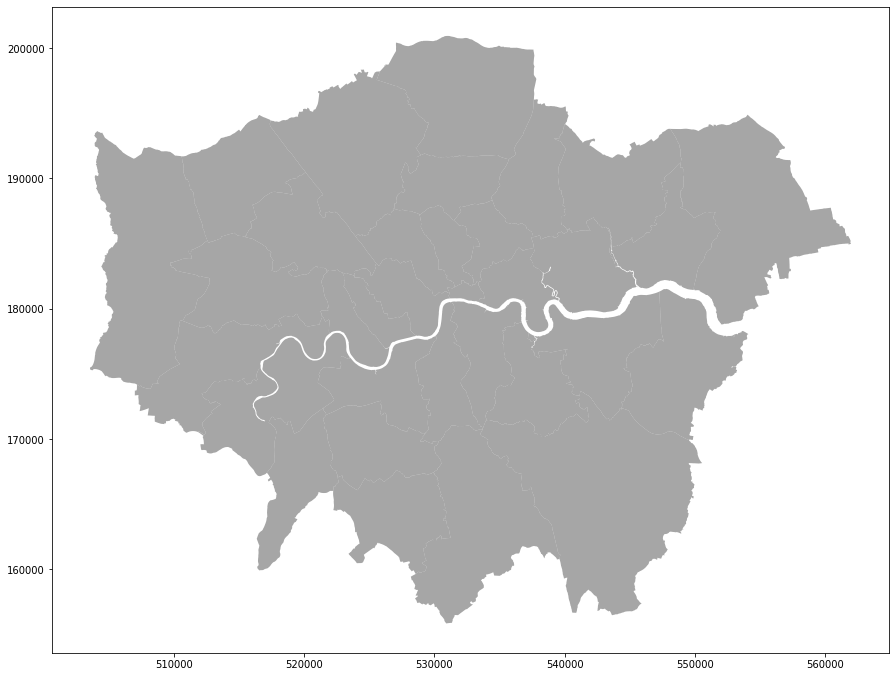

In [103]:
fig,ax = plotty.subplots(figsize=(15,15))
borough_map.plot(ax=ax, alpha=0.7, color="grey")
geo_df['geometry', 'district']
geo_df[geo_df['district'] == 'HACKNEY'].plot(ax=ax, markersize=5, color="blue")
# plotty.legend(prop={'size': 15})

In [22]:
!ls ../data/raw/statistical-gis-boundaries-london/ESRI

LSOA_2004_London_Low_Resolution.dbf
LSOA_2004_London_Low_Resolution.prj
LSOA_2004_London_Low_Resolution.shp
LSOA_2004_London_Low_Resolution.shx
LSOA_2011_London_gen_MHW.dbf
LSOA_2011_London_gen_MHW.prj
LSOA_2011_London_gen_MHW.sbn
LSOA_2011_London_gen_MHW.sbx
LSOA_2011_London_gen_MHW.shp
LSOA_2011_London_gen_MHW.shp.xml
LSOA_2011_London_gen_MHW.shx
London_Borough_Excluding_MHW.GSS_CODE.atx
London_Borough_Excluding_MHW.NAME.atx
London_Borough_Excluding_MHW.dbf
London_Borough_Excluding_MHW.prj
London_Borough_Excluding_MHW.sbn
London_Borough_Excluding_MHW.sbx
London_Borough_Excluding_MHW.shp
London_Borough_Excluding_MHW.shp.xml
London_Borough_Excluding_MHW.shx
London_Ward.BOROUGH.atx
London_Ward.GSS_CODE.atx
London_Ward.LB_GSS_CD.atx
London_Ward.cpg
London_Ward.dbf
London_Ward.prj
London_Ward.sbn
London_Ward.sbx
London_Ward.shp
London_Ward.shp.xml
London_Ward.shx
London_Ward_CityMerged.BOROUGH.atx
London_Ward_CityMerged.GSS_CODE.atx
London_Ward_CityMerged.LB_GSS_CD.atx
London_Ward_CityMer

In [14]:
profile_file = '../data/raw/london-borough-profiles.csv'
# /Users/david.maceachern/dev/github/data-science/QAC020X303/data/raw/london-borough-profiles.csv
df = pd.read_csv(profile_file, header=0, encoding='cp1252')
df.head()

Code             Area_name Inner/_Outer_London  \
0  E09000001        City of London        Inner London   
1  E09000002  Barking and Dagenham        Outer London   
2  E09000003                Barnet        Outer London   
3  E09000004                Bexley        Outer London   
4  E09000005                 Brent        Outer London   

   GLA_Population_Estimate_2017 GLA_Household_Estimate_2017  \
0                          8800                        5326   
1                        209000                       78188   
2                        389600                      151423   
3                        244300                       97736   
4                        332100                      121048   

  Inland_Area_(Hectares) Population_density_(per_hectare)_2017  \
0                    290                                  30.3   
1                  3,611                                  57.9   
2                  8,675                                  44.9   
3                  6,058                                  40.3   
4                  4,323                                  76.8   

   Average_Age,_2017  Proportion_of_population_aged_0-15,_2015  \
0               43.2                                      11.4   
1               32.9                                      27.2   
2               37.3                                      21.1   
3               39.0                                      20.6   
4               35.6                                      20.9   

   Proportion_of_population_of_working-age,_2015  ...  \
0                                           73.1  ...   
1                                           63.1  ...   
2                                           64.9  ...   
3                                           62.9  ...   
4                                           67.8  ...   

   Happiness_score_2011-14_(out_of_10) Anxiety_score_2011-14_(out_of_10)  \
0                                  6.0                               5.6   
1                                  7.1                               3.1   
2                                  7.4                               2.8   
3                                  7.2                               3.3   
4                                  7.2                               2.9   

  Childhood_Obesity_Prevalance_(%)_2015/16 People_aged_17+_with_diabetes_(%)  \
0                                      NaN                               2.6   
1                                     28.5                               7.3   
2                                     20.7                               6.0   
3                                     22.7                               6.9   
4                                     24.3                               7.9   

  Mortality_rate_from_causes_considered_preventable_2012/14  \
0                                                129          
1                                                228          
2                                                134          
3                                                164          
4                                                169          

  Political_control_in_council  \
0                            .   
1                          Lab   
2                         Cons   
3                         Cons   
4                          Lab   

  Proportion_of_seats_won_by_Conservatives_in_2014_election  \
0                                                  .          
1                                                  0          
2                                               50.8          
3                                               71.4          
4                                                9.5          

  Proportion_of_seats_won_by_Labour_in_2014_election  \
0                                                  .   
1                                                100   
2                                                  .   
3                 

In [16]:
data_for_map = df.rename(index=str, columns={“Happiness_score_2011–14_(out_of_10)”: “happiness”,
“Anxiety_score_2011–14_(out_of_10)”: “anxiety”,
“Population_density_(per_hectare)_2017”: “pop_density_per_hectare”,
“Mortality_rate_from_causes_considered_preventable_2012/14”: ‘mortality’})
# check results
data_for_map.head()

SyntaxError: invalid character in identifier (<ipython-input-16-779dec41ab71>, line 1)

In [119]:
borough_maps = ['LSOA_2004_London_Low_Resolution.shp',
                'LSOA_2011_London_gen_MHW.shp',
                'London_Borough_Excluding_MHW.shp',
                'London_Ward.shp',
                'London_Ward_CityMerged.shp',
                'MSOA_2004_London_High_Resolution.shp',
                'MSOA_2011_London_gen_MHW.shp',
                'OA_2011_London_gen_MHW.shp']
    
def make_map(shape_file_key):
    shape_file = borough_maps[shape_file_key]
    shape_file_address = '../data/raw/statistical-gis-boundaries-london/ESRI/' + shape_file
    borough_map = gpd.read_file(shape_file_address)
    fig,ax = plotty.subplots(figsize=(100,100))
    borough_map.plot(ax=ax, color="grey")

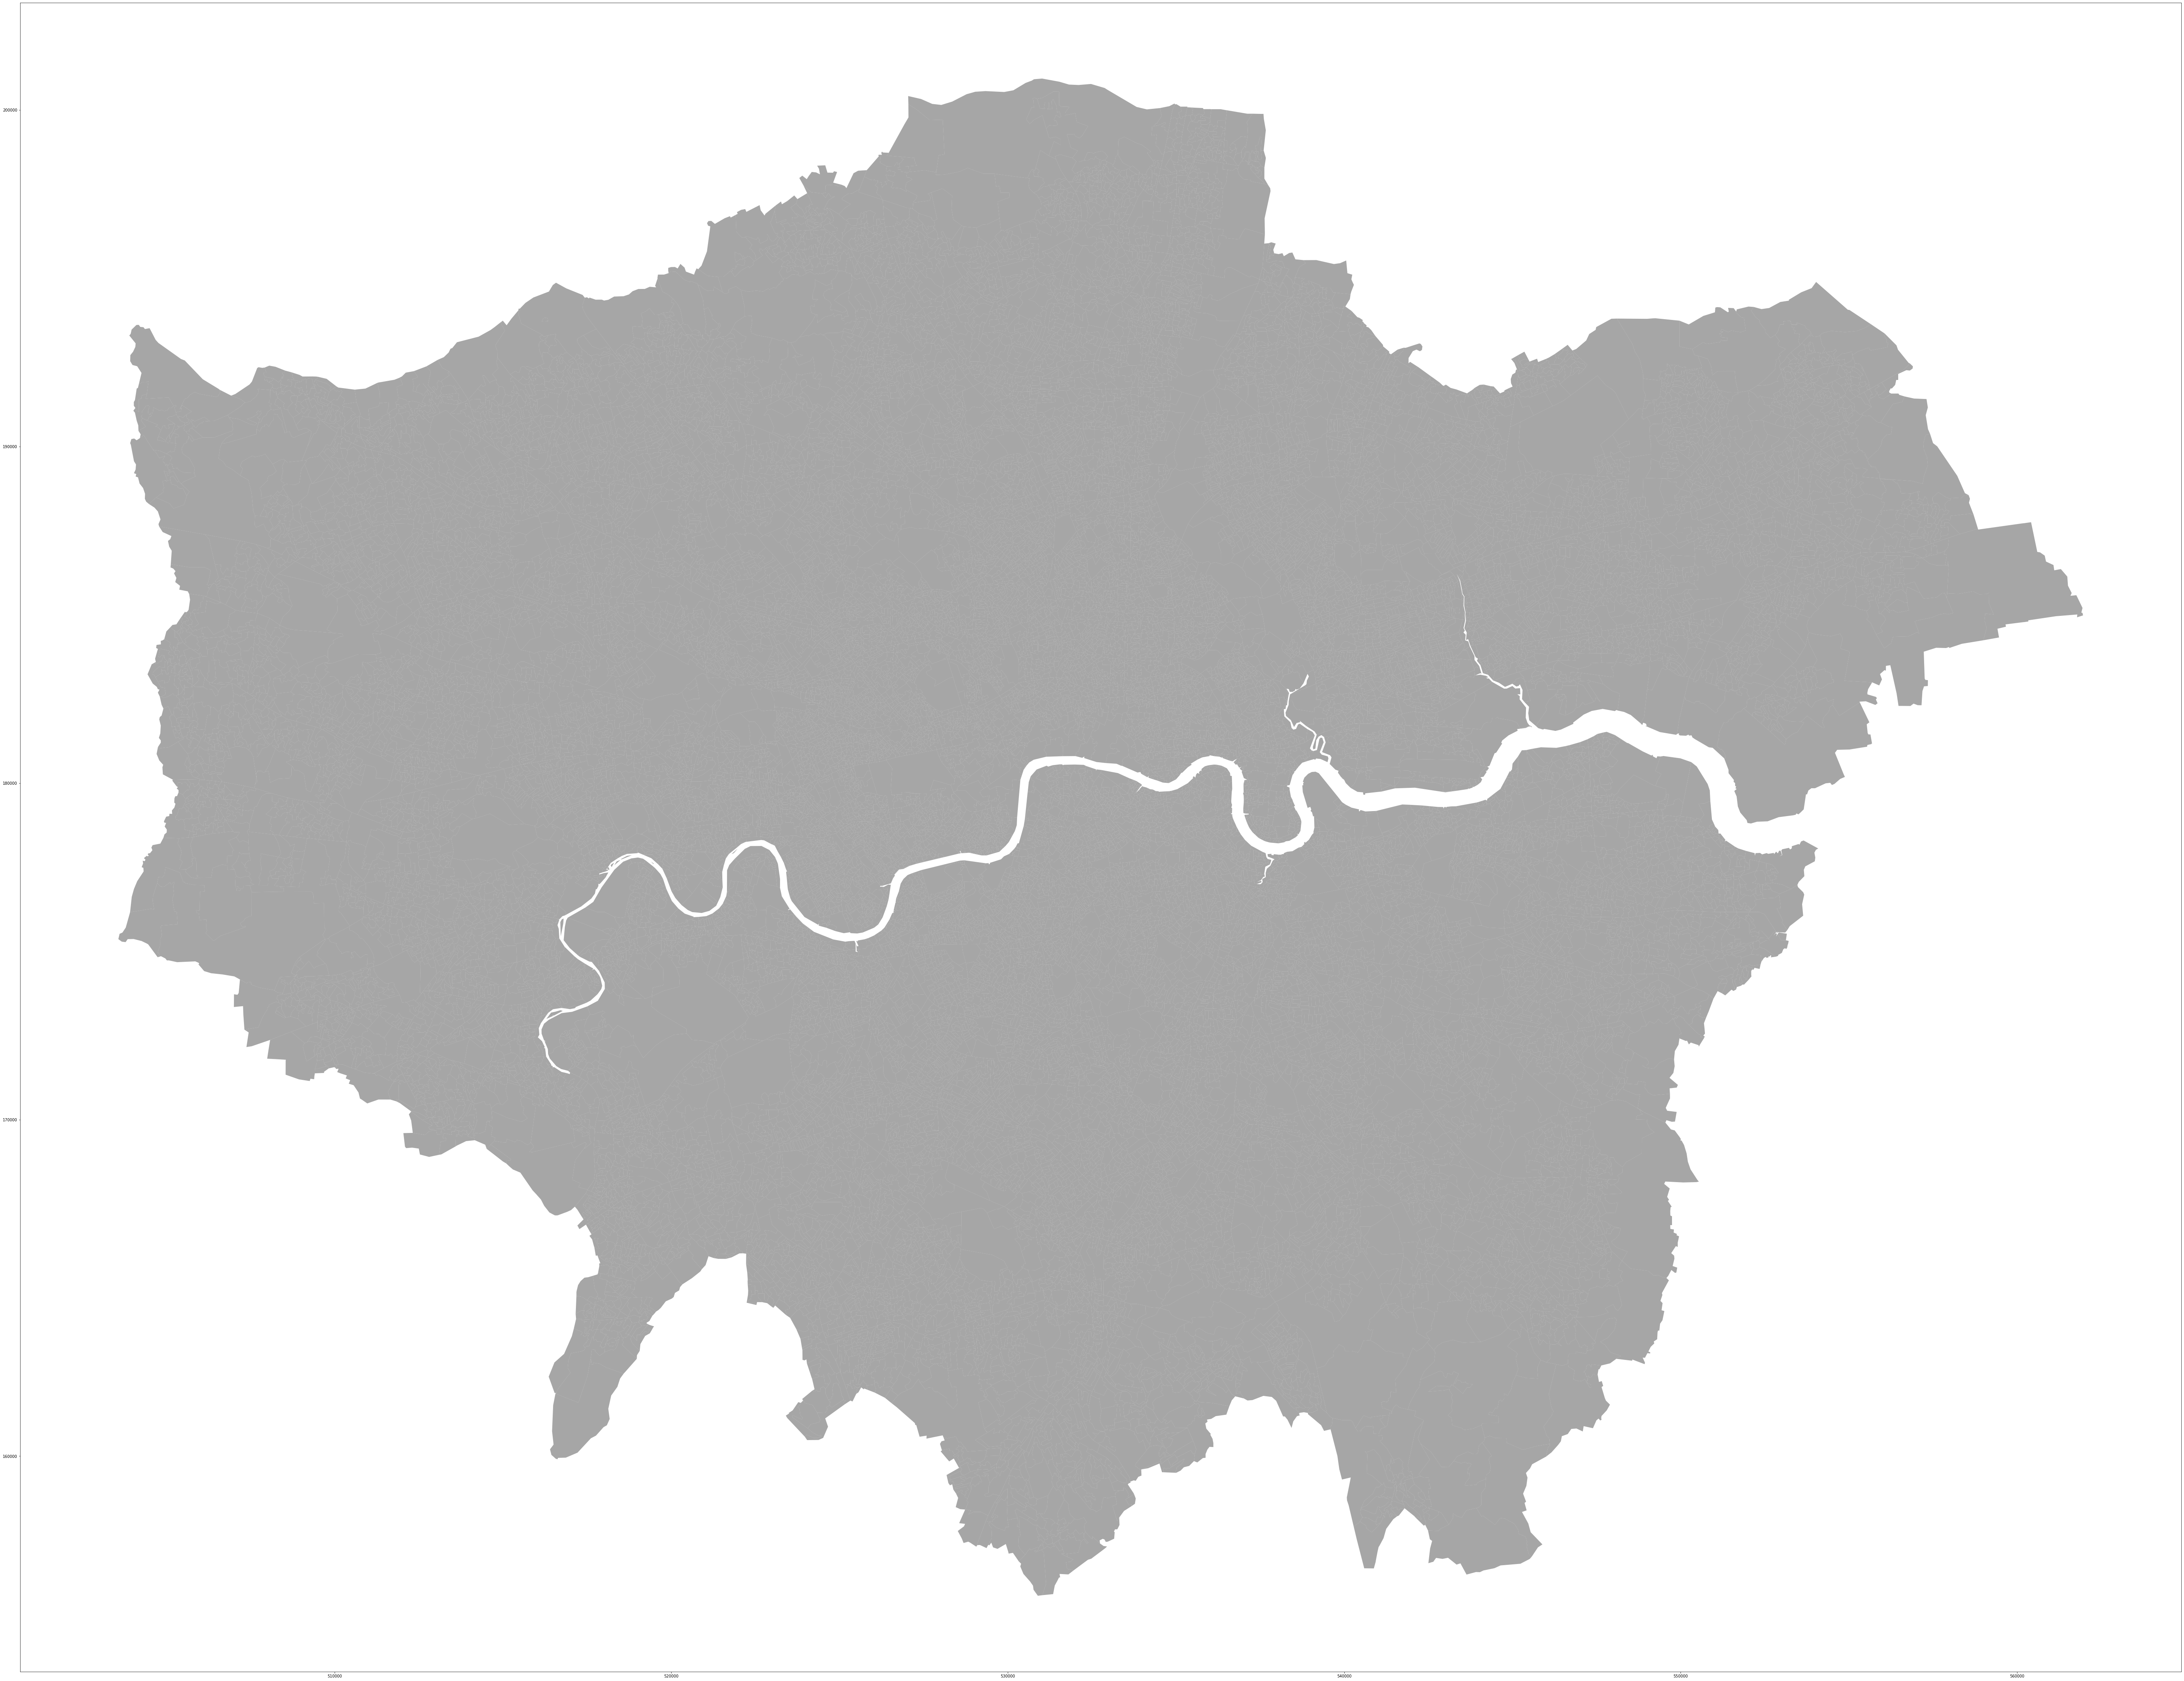

In [118]:
make_map(7)